*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/3_head_modifiers.ipynb)*

# Time Adverbial Distribution and Collocations
## Head Modifiers
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Sat 13 Jun 2020 13:15:48 BST


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# see .py's for variables
from config import *
from get_hmod_sample import *

# Head and Modifier Sample

## Function Head Lexemes

In [3]:
head2funct = pd.pivot_table(
    head_mod_df,
    index='head_etcbc',
    columns='function',
    aggfunc='size',
    fill_value=0
)

print(head2funct.shape)
head2funct.head()

(4221, 6)


function,Adju,Cmpl,Loca,Objc,Subj,Time
head_etcbc,,,,,,
<B/,6,6,0,4,7,0
<B=/,0,0,0,0,1,0
<B==/,0,1,0,0,0,0
<BD/,21,88,0,42,147,0
<BDH/,17,12,0,19,10,0


### Function head lexeme diversity

Determine how many head lexemes per 100 uses are found for each function.<br>
Adapted from ["Normalizing Word Counts"](http://www.thegrammarlab.com/?nor-portfolio=normalizing-word-counts).

In [4]:
is_attested = (head2funct > 0) * 1
n_attested = is_attested.sum()
head_per_100 = (n_attested / head2funct.sum()) * 100 # normalize per 100 uses of the function
head_per_100 = head_per_100.sort_values()

In [5]:
n_attested

function
Adju    1473
Cmpl    2035
Loca     354
Objc    2214
Subj    2408
Time     122
dtype: int64

In [6]:
head2funct.sum()

function
Adju     6825
Cmpl    17444
Loca     2137
Objc    16684
Subj    26540
Time     3999
dtype: int64

In [7]:
head_per_100

function
Time     3.050763
Subj     9.073097
Cmpl    11.665902
Objc    13.270199
Loca    16.565278
Adju    21.582418
dtype: float64

In [8]:
head2funct.sum(1).sort_values(ascending=False).head(25)

head_etcbc
JHWH/     3212
JWM/      1681
BN/       1397
>RY/      1378
>JC/      1169
JD/       1100
BJT/       990
<M/        980
DBR/       918
MLK/       918
HW>        904
>LHJM/     771
>NJ        733
<JN/       700
CM/        689
KL/        663
CM         654
>TH        636
DWD==/     583
JFR>L/     550
MCH=/      537
NPC/       516
<JR/       513
LB/        424
DRK/       423
dtype: int64

### Association: how associated are given head words with their attested function?

Apply Fisher's exact test for statistical significance between given functions and given head lexemes.

In [9]:
fish_head, odds_head = mystats.apply_fishers(head2funct, 0, 1)
fish_head.head()

,Adju,Cmpl,Loca,Objc,Subj,Time
<B/,1.795318,0.093306,0.000000,-0.095321,-0.175190,-0.197706
<B=/,0.000000,0.000000,0.000000,0.000000,0.443148,0.000000
<B==/,0.000000,0.625403,0.000000,0.000000,0.000000,0.000000
<BD/,-0.641076,1.695613,-3.457775,-3.535737,5.544404,-6.962915
<BDH/,4.888744,-0.120809,-0.378663,1.082936,-2.625727,-1.118166


In [10]:
# look at number of Fisher values with positive statistical significance threshold

# total number of heads per function
total_heads = (head2funct != 0) * 1
total_heads = total_heads.sum()

# total number of statistically attracted heads per function
#sig_heads = (fish_head > 1.3) * 1  # multiply by 1 to convert T/F to 0/1 for summing

sig_heads = (fish_head >= 1.3)  * 1
sig_heads = sig_heads.sum()

# proportion of statistically attracted heads per function
sig_heads_prop = sig_heads.div(total_heads).sort_values()

sig_heads_prop

Subj    0.106312
Cmpl    0.129730
Objc    0.178862
Adju    0.213849
Loca    0.451977
Time    0.491803
dtype: float64

### Get top 10 heads per function

In [11]:
def get_lexnode(lex_str):
    """Lookup lexnode for BHSA lex string"""
    node = next(
        l for l in F.otype.s('lex') 
            if F.lex.v(l) == lex_str
    )
    return node

In [12]:
top_10s = [] 

for funct in fish_head.columns:
    scores = fish_head[funct]
    sig_scores = scores[scores >= 1.3]
    top_scores = sig_scores.sort_values(ascending=False)
    raw_scores = top_scores.values
    lexs = [F.voc_lex_utf8.v(get_lexnode(l)) for l in top_scores.index]
    top_10s.append(pd.DataFrame(zip(lexs, raw_scores), columns=('lex', 'score')))

In [13]:
top_10_scores = pd.concat(top_10s, axis=1, keys=fish_head.columns)
top_10_scores.index = top_10_scores.index + 1
top_10_scores.index.name = 'ranks'
#top_10_scores.head(20).round(2).to_clipboard()
top_10_scores.head(20)

Adju                      Cmpl                     Loca  \
               lex       score           lex      score           lex   
ranks                                                                   
1             כֵּן  116.212356         אֶרֶץ  83.615291          שָׁם   
2              רֹב   31.384549        בַּיִת  77.371022         אֶרֶץ   
3             פֶּה   30.673952  יְרוּשָׁלִַם  72.179917      מִדְבָּר   
4            חֶרֶב   26.640079          שָׁם  55.203894           הַר   
5            אַיִן   23.771744           יָד  49.467504        שָׂדֶה   
6           בֶּטַח   23.574032     מִצְרַיִם  40.113024        בַּיִת   
7            עַיִן   22.554487          עִיר  30.354284  יְרוּשָׁלִַם   
8        מִשְׁפָּט   15.468284        בָּבֶל  26.956269        מָקֹום   
9      מִשְׁפָּחָה   14.242109         אֹהֶל  26.941670          פֹּה   
10         שָׁלֹום   14.069143        מָקֹום  25.588181         קֶרֶב   
11          עֲבוּר   13.445506           הַר  24.010349       שֶׁמֶשׁ   
12        רִאשֹׁון   12.977548         קֶרֶב  17.960539          חוּץ   
13        שְׁגָגָה   12.399168       תָּוֶךְ  17.668773        שַׁעַר   
14            כֹּל   12.174419          רֵעַ  17.398955        פֶּתַח   
15           מַעַל   12.112076    יִשְׂרָאֵל  17.021728      שָׁמַיִם   
16            עֹור   12.013872       מַחֲנֶה  15.739471      חֶבְרֹון   
17          רָצֹון   11.629947           אָב  15.191144       גְּבוּל   
18           מְאֹד   10.105725       דֶּרֶךְ  14.009393         חֹרֵב   
19       נְעוּרִים    9.675194          אֵשׁ  13.871615       צִיֹּון   
20          שֵׁבֶט    9.552445        פֶּתַח  13.204121     שֹׁמְרֹון   

                      Objc                  Subj                  Time  \
            score      lex      score        lex       score       lex   
ranks                                                                    
1      293.741948      מָה  51.284759       הוּא         inf      יֹום   
2       81.251577   דָּבָר  50.776774      אֲנִי         inf    עַתָּה   
3       63.792119   בֶּגֶד  50.189839     יְהוָה  299.636897      עֹוד   
4       41.005952  בְּרִית  43.832688     אַתָּה  283.978640    שָׁנָה   
5       22.847530    לֶחֶם  40.135403    אָנֹכִי  151.276956    עֹולָם   
6       19.949215   פָּנֶה  30.312075       הִיא  140.111978       אָז   
7       19.712395      חֵן  27.810431     אַתֶּם  110.668355       עֵת   
8       19.494335    זָהָב  22.909954      אִישׁ   94.510988   לַיְלָה   
9       18.375897   נֶפֶשׁ  20.794545     הֵמָּה   93.736793    בֹּקֶר   
10      18.064280   כֶּסֶף  20.346116        הֵם   83.183117     עֶרֶב   
11      17.474881  עֶרְוָה  19.898047        מִי   72.574953    חֹדֶשׁ   
12      16.362780     דָּם  19.741338    אֲדֹנָי   67.208762   תָּמִיד   
13      15.264336    עֹלָה  17.787915     אֵלֶּה   57.911346    פַּעַם   
14      15.162394     שֵׁם  16.902898     דָּוִד   45.721637     מָחָר   
15      14.347216  קְטֹרֶת  16.075049  אֲנַחְנוּ   43.478327     אַחַר   
16      13.369446     יָהּ  14.274465     כֹּהֵן   40.590581    יֹומָם   
17      13.288518  בָּשָׂר  13.718063       בֵּן   32.012241   מָחֳרָת   
18      11.534224  שְׁבוּת  13.543953        זֶה   30.487527     מָתַי   
19      11.229917     טֹוב  13.399706   אֱלֹהִים   29.770682  פִּתְאֹם   
20       9.668594   אֲרֹון  12.733457     מֶלֶךְ   27.847330     נֵצַח   

                   
            score  
ranks              
1             inf  
2             inf  
3             inf  
4      267.809366  
5      212.236755  
6      160.220129  
7      155.782399  
8      144.185356  
9      120.564921  
10      91.265502  
11      72.440679  
12      60.904322  
13      55.336993  
14      52.863870  
15      43.071101  
16      31.658315  
17      31.517807  
18      29.159311  
19      29.123278  
20      26.492863

In [14]:
#functs_df[(functs_df.function == 'Adju') & (functs_df.head_etcbc == '>JN/')] 

**Plot head lexeme diversity and association to head**

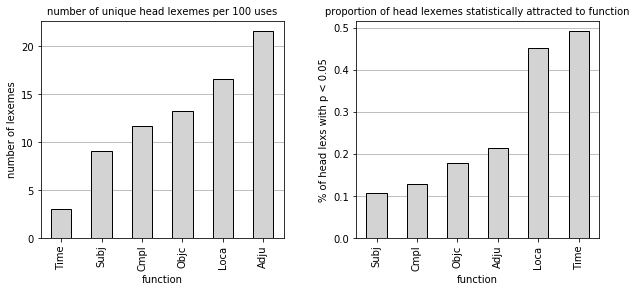

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.3)

head_per_100.plot(kind='bar', ax=ax1, color='lightgrey', edgecolor='black')
ax1.set_xlabel('function')
ax1.set_ylabel('number of lexemes')
ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.set_title('number of unique head lexemes per 100 uses', size=10)

sig_heads_prop.plot(kind='bar', ax=ax2, color='lightgrey', edgecolor='black')
ax2.set_xlabel('function')
ax2.set_ylabel('% of head lexs with p < 0.05')
ax2.grid(axis='y')
ax2.set_axisbelow(True) 
ax2.set_title('proportion of head lexemes statistically attracted to function', size=10)
              
savefig('function_head_associations')
plt.show()

## Function x Component Associations

In [20]:
select_components = [
    'plural', 'suffix', 'definite', 'demonstrative', 'cardinal', 
    'ordinal', 'genitive', 'preposition', 'qualitative', 'ø'
]

In [21]:
head_mod_df[~head_mod_df['cardinal'] & ~head_mod_df['preposition'] & (head_mod_df.function=='Time')]

,function,ref,book,ph_type,head,text,token,clause,sentence,classi,...,demon_str,demon_dist,ordinal,ord_str,cl_kind,verb,tense,verb_lex,book_sbl,lang
node,,,,,,,,,,,,,,,,,,,,,
651957,Time,Gen 2:5,Genesis,prep,טרם,טֶ֚רֶם,טרם,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָ...,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָ...,single.bare.øanchor,...,NaN,NaN,False,NaN,VC,True,yqtl,היה,Gen,Hebrew
651962,Time,Gen 2:5,Genesis,prep,טרם,טֶ֣רֶם,טרם,וְכָל־עֵ֥שֶׂב הַשָּׂדֶ֖ה טֶ֣רֶם יִצְמָ֑ח,וְכָל־עֵ֥שֶׂב הַשָּׂדֶ֖ה טֶ֣רֶם יִצְמָ֑ח,single.bare.øanchor,...,NaN,NaN,False,NaN,VC,True,yqtl,צמח,Gen,Hebrew
652380,Time,Gen 3:14,Genesis,numb_ph,יום,כָּל־יְמֵ֥י חַיֶּֽיךָ׃,כל.יום.חיים,וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃,וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃,single.genitive.quantified.qualitative,...,NaN,NaN,False,NaN,VC,True,yqtl,אכל,Gen,Hebrew
652427,Time,Gen 3:17,Genesis,numb_ph,יום,כֹּ֖ל יְמֵ֥י חַיֶּֽיךָ׃,כל.יום.חיים,בְּעִצָּבֹון֙ תֹּֽאכֲלֶ֔נָּה כֹּ֖ל יְמֵ֥י חַיּ...,בְּעִצָּבֹון֙ תֹּֽאכֲלֶ֔נָּה כֹּ֖ל יְמֵ֥י חַיּ...,single.genitive.quantified.qualitative,...,NaN,NaN,False,NaN,VC,True,yqtl,אכל,Gen,Hebrew
652475,Time,Gen 3:22,Genesis,cont,עתה,עַתָּ֣ה׀,עתה,וְעַתָּ֣ה׀,וְעַתָּ֣ה׀,single.bare.øanchor,...,NaN,NaN,False,NaN,WP,False,NaN,NaN,Gen,Hebrew
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903911,Time,2 Chr 34:16,2_Chronicles,cont,עוד,עֹ֧וד,עוד,וַיָּ֨שֶׁב עֹ֧וד אֶת־הַמֶּ֛לֶךְ דָּבָ֖ר,וַיָּ֨שֶׁב עֹ֧וד אֶת־הַמֶּ֛לֶךְ דָּבָ֖ר לֵאמֹ֑ר,single.bare.øanchor,...,NaN,NaN,False,NaN,VC,True,wyqtl,שׁוב,2 Chr,Hebrew
904163,Time,2 Chr 34:33,2_Chronicles,numb_ph,יום,כָּל־יָמָ֕יו,כל.יום,כָּל־יָמָ֕יו לֹ֣א סָ֔רוּ מֵֽאַחֲרֵ֕י יְהוָ֖ה א...,כָּל־יָמָ֕יו לֹ֣א סָ֔רוּ מֵֽאַחֲרֵ֕י יְהוָ֖ה א...,single.quantified.qualitative,...,NaN,NaN,False,NaN,VC,True,qtl,סור,2 Chr,Hebrew
904305,Time,2 Chr 35:14,2_Chronicles,prep,אחר,אַחַ֗ר,אחר,וְאַחַ֗ר הֵכִ֤ינוּ לָהֶם֙ וְלַכֹּ֣הֲנִ֔ים,וְאַחַ֗ר הֵכִ֤ינוּ לָהֶם֙ וְלַכֹּ֣הֲנִ֔ים,single.bare.øanchor,...,NaN,NaN,False,NaN,VC,True,qtl,כון,2 Chr,Hebrew


In [22]:
functs_df = functs_df * 1

In [23]:
functXcomp = pd.pivot_table(
    head_mod_df,
    index='function',
    values=select_components,
    aggfunc='sum'
)

functXcomp

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
function,,,,,,,,,,
Adju,101.0,1279.0,78.0,1552.0,11.0,1394.0,6457.0,311.0,1452.0,1974.0
Cmpl,121.0,3915.0,227.0,3556.0,9.0,3258.0,15887.0,480.0,3734.0,5436.0
Loca,22.0,589.0,32.0,508.0,2.0,244.0,1646.0,71.0,196.0,782.0
Objc,337.0,1992.0,289.0,2911.0,26.0,4137.0,5234.0,640.0,4393.0,5322.0
Subj,278.0,3212.0,186.0,3787.0,25.0,5690.0,94.0,831.0,3859.0,12616.0
Time,408.0,1343.0,494.0,409.0,163.0,600.0,1975.0,213.0,102.0,1590.0


In [24]:
#functXcomp.to_clipboard()

In [25]:
functXcomp_dp = mystats.apply_deltaP(functXcomp, 0, 1)
functXcomp_f, oddsratios = mystats.apply_fishers(functXcomp, 0, 1, logtransform=False)

In [26]:
functXcomp_dp # ΔP scores 

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
function,,,,,,,,,,
Adju,-0.004312,-0.018843,-0.006483,-0.001311,-0.001413,-0.038678,0.202884,-0.000229,-0.018871,-0.112743
Cmpl,-0.010696,0.004099,-0.006983,-0.014891,-0.002527,-0.058431,0.245592,-0.012133,-0.020231,-0.123800
Loca,-0.005508,0.041298,-0.003317,0.017359,-0.001557,-0.072195,0.143069,-0.004286,-0.070471,-0.044392
Objc,0.003352,-0.032130,0.000519,0.009866,-0.001225,0.043618,-0.072573,0.004865,0.073519,-0.029811
Subj,-0.002160,0.001314,-0.006659,0.022189,-0.001583,0.076494,-0.351855,0.007666,0.013838,0.240756
Time,0.048187,0.085229,0.060396,-0.054704,0.021681,-0.050196,0.006968,0.008207,-0.108648,-0.017120


In [27]:
oddsratios

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
Adju,0.613207,0.805899,0.448673,0.986361,0.347112,0.681143,2.520603,0.989134,0.822818,0.474081
Cmpl,0.233462,1.044644,0.466921,0.852736,0.088393,0.564857,3.304673,0.512909,0.815631,0.465975
Loca,0.491232,1.469997,0.699795,1.185601,0.238551,0.417610,1.923474,0.798417,0.374702,0.766961
Objc,1.340407,0.685571,1.048147,1.105903,0.455867,1.434519,0.672679,1.244045,1.887609,0.842881
Subj,0.806289,1.014151,0.474204,1.249118,0.340062,1.857593,0.005604,1.403898,1.140941,3.385279
Time,7.606429,2.057020,9.870188,0.476751,34.776413,0.586978,1.036230,1.402861,0.101431,0.906858


In [28]:
functXcomp_f.round(5) # p-values for statistical significance (Fisher's exact)

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
Adju,-0.00000,-0.00000,-0.00000,-0.63773,-0.00010,-0.0,0.0000,-0.87894,-0.0,-0.00000
Cmpl,-0.00000,0.03310,-0.00000,-0.00000,-0.00000,-0.0,0.0000,-0.00000,-0.0,-0.00000
Loca,-0.00035,0.00000,-0.04712,0.00057,-0.01960,-0.0,0.0000,-0.06218,-0.0,-0.00000
Objc,0.00001,-0.00000,0.47592,0.00001,-0.00004,0.0,-0.0000,0.00000,0.0,-0.00000
Subj,-0.00139,0.52125,-0.00000,0.00000,-0.00000,0.0,-0.0000,0.00000,0.0,0.00000
Time,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.0,0.1929,0.00001,-0.0,-0.00079


In [34]:
def heatmap(data, center=0, **kwargs):
    """Draw seaborne heatmap with custom settings"""
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(
        data,
        center=center,
        cmap=cmap,
        square=True,
        linewidth=.5,
        **kwargs
    )

### PCA clustering of functions based on components

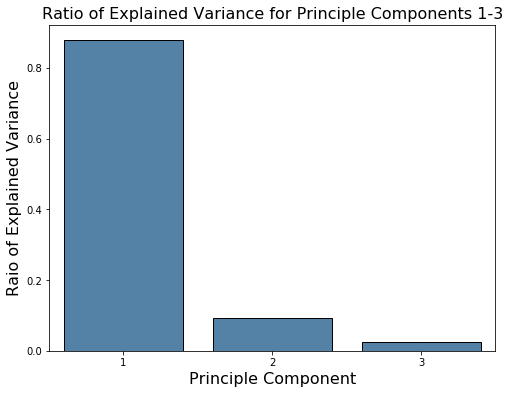

In [35]:
fc_pca, fc_loadings = my_pca.apply_pca(
    functXcomp_dp, 
    sample_axis=0, 
    feature_axis=1,
    components=3,
)

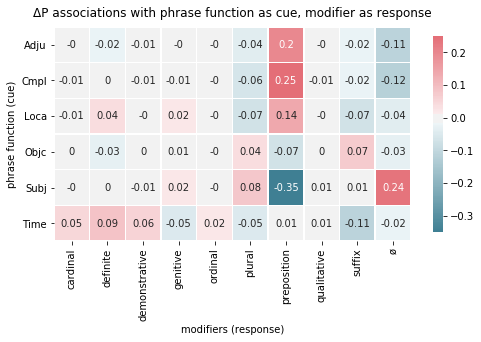

In [36]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# plot scores
heatmap(functXcomp_dp.round(2), ax=ax1, annot=True, cbar_kws={'shrink': 0.6})
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
ax1.set_title('ΔP associations with phrase function as cue, modifier as response', pad=10)
ax1.set_xlabel('modifiers (response)')
ax1.set_ylabel('phrase function (cue)')


savefig('ΔP_funct_modifiers')

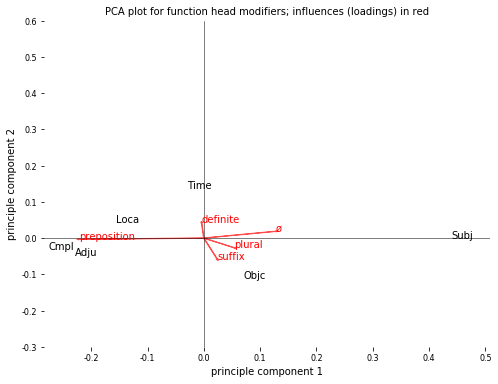

In [37]:
fig, ax2 = plt.subplots(figsize=(8, 6))

# plot PCA
x, y = fc_pca['PC1'], fc_pca['PC2']
ax2.scatter(x, y, s=9, color='')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.set_xlabel('principle component 1')
ax2.set_ylabel('principle component 2')
ax2.set_title('PCA plot for function head modifiers; influences (loadings) in red', size=10)
#ax2.axis('equal')
ax2.set_yticks(ax2.get_xticks())

# Hide the spines but keep the ticks
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_yticklabels(ax2.get_yticks().round(1), size=8)
ax2.set_xticklabels(ax2.get_xticks().round(1), size=8)

# plot function labels
xoff = -0.03
yoff = -0.002
for i, function in enumerate(fc_pca.index):
    ax2.text(x[i]+xoff, y[i]+yoff, function)
    
# plot loadings arrows + labels (scree plot)
loads = fc_loadings.T[[1, 2]].loc[fc_loadings.T[[1, 2]].abs().sum(1).sort_values(ascending=False).index][:5]
for l in loads.index:
    x,y = loads.loc[l]
    ax2.arrow(0, 0, x, y, color='#ff4d4d')
    ax2.text(x, y, l, color='red', size=10)

savefig('PCA_ΔP_funct_modis')

## Head Word x Modifier Associations (Time)

In [38]:
times = head_mod_df[head_mod_df.function == 'Time']

headXmod = pd.pivot_table(
    times,
    index='head',
    values=select_components,
    aggfunc='sum',
    fill_value=0,
).T

In [39]:
head_delt_mod = mystats.apply_deltaP(headXmod, 0, 1).fillna(0)
head_delt_mod = head_delt_mod[head_delt_mod.abs().sum().sort_values(ascending=False).index]
head_delt_mod.iloc[:, :20]

head,יום,שׁנה,עתה,עוד,עולם,עת,בקר,חדשׁ,ערב,לילה,אז,מות,כן,פעם,תמיד,מחר,חיים,נעורים,דבר,נצח
cardinal,-0.036257,0.402855,-0.052548,-0.054435,-0.050515,-0.054725,-0.034403,0.040372,-0.024532,-0.027468,-0.019596,-0.007693,-0.015097,0.060353,-0.007839,-0.007258,-0.002613,-0.002613,-0.007403,-0.007839
definite,0.215808,-0.036244,-0.060799,-0.062983,-0.055710,0.009686,0.052363,0.001730,0.045533,0.036127,-0.022674,-0.008902,-0.017467,0.000325,-0.009070,-0.008398,-0.003023,-0.003023,0.002385,-0.009070
demonstrative,0.366366,-0.050066,-0.048869,-0.055123,-0.051154,0.085717,-0.034838,-0.020499,-0.024842,0.008181,-0.019844,-0.007791,-0.015287,-0.003809,-0.007938,-0.007350,-0.002646,-0.002646,0.018559,-0.007938
genitive,0.250211,-0.025607,-0.052555,-0.046672,-0.047932,0.069595,-0.034408,-0.006404,-0.024535,-0.032666,-0.017009,0.033748,-0.015099,-0.012340,-0.007840,-0.007259,-0.002613,-0.002613,-0.007404,-0.005250
ordinal,0.234065,0.094641,-0.050743,-0.052565,-0.048780,-0.052846,-0.033221,0.145739,-0.017414,-0.031539,-0.018923,-0.007429,-0.014578,0.000636,-0.007569,-0.007009,-0.002523,-0.002523,-0.007149,-0.007569
plural,0.222923,0.082613,-0.054054,-0.055995,-0.042884,-0.045398,-0.029941,0.018349,-0.025235,-0.024517,-0.020158,-0.007914,-0.015529,0.039971,-0.008063,-0.007466,0.008208,0.008208,0.012361,-0.008063
preposition,-0.028905,-0.023029,-0.063854,-0.062826,0.051936,0.035379,0.035304,0.000180,0.026560,-0.005483,-0.019118,0.008786,0.016558,-0.013195,-0.010147,-0.005924,0.000783,0.000783,0.000136,0.007903
qualitative,0.375338,-0.043332,-0.051101,-0.052936,-0.049125,-0.000023,-0.033456,-0.019021,-0.023857,0.060122,-0.019057,-0.007482,-0.014681,-0.002327,-0.007623,-0.007058,-0.002541,-0.002541,-0.007199,-0.007623
suffix,-0.032230,-0.041824,-0.050313,-0.012348,-0.048367,0.047032,-0.032940,0.006340,-0.023489,-0.031272,-0.018763,0.092063,-0.014454,-0.011814,-0.007505,-0.006949,0.057156,0.057156,0.012798,-0.007505
ø,-0.547345,-0.077799,0.221240,0.221374,0.075728,-0.062843,-0.027053,-0.028809,-0.027200,-0.002434,0.076864,-0.009287,0.023593,-0.014894,0.033962,0.027426,-0.003154,-0.003154,-0.008936,0.012250


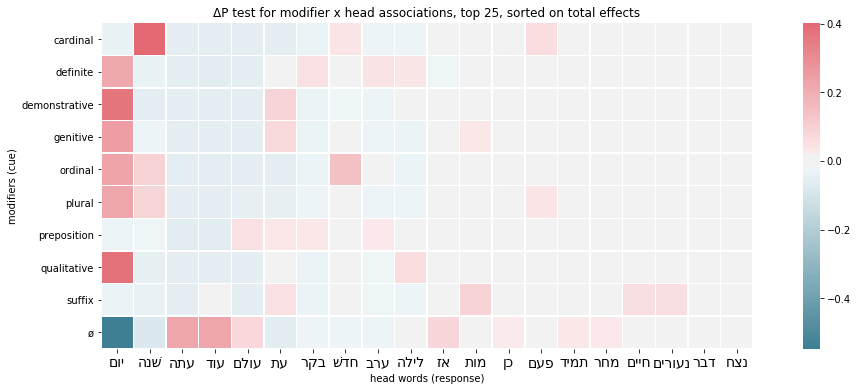

In [40]:
fig, ax = plt.subplots(figsize=(18, 6))

heatmap(head_delt_mod.iloc[:,:20], ax=ax,)
x_tick_labels = [get_display(hw._text) for hw in ax.get_xticklabels()] # fix Hebrew labels
ax.set_xticklabels(x_tick_labels, size=14)
ax.set_ylabel('modifiers (cue)')
ax.set_xlabel('head words (response)')
ax.set_title('ΔP test for modifier x head associations, top 25, sorted on total effects')

savefig('ΔP_mod_head')

plt.show()

In [41]:
head_counts = times['head'].value_counts(ascending=False)
head_prop = head_counts / head_counts.sum()

head_prop

יום     0.337834
עוד     0.092023
עתה     0.089022
שׁנה    0.065266
עולם    0.044511
          ...   
רוח     0.000250
מעים    0.000250
מצער    0.000250
פה      0.000250
רחם     0.000250
Name: head, Length: 120, dtype: float64

In [42]:
head_counts

יום     1351
עוד      368
עתה      356
שׁנה     261
עולם     178
        ... 
רוח        1
מעים       1
מצער       1
פה         1
רחם        1
Name: head, Length: 120, dtype: int64

In [43]:
head_counts.sum()

3999

## Modifier x Modifier Association

In [44]:
comps_data = {}
dp_comps = {}

functions = [
    'Time',
    'Loca',
    'Adju',
    'Cmpl',
    'Objc',
    'Subj',
]

for funct in functions:

    funct_data = functs_df[functs_df.function == funct]
    comps = funct_data[select_components] * 1 # mult by 1 turns T/F into 1/0
    comps = comps.T.dot(comps) # dot product for pairwise
    np.fill_diagonal(comps.values, 0) # ignore diagonals
    comps_data[funct] = comps
    
    deltaP_comps = mystats.apply_deltaP(comps, 0, 1)
    np.fill_diagonal(deltaP_comps.values, 0)
    dp_comps[funct] = deltaP_comps

In [45]:
dp_comps.keys()

dict_keys(['Time', 'Loca', 'Adju', 'Cmpl', 'Objc', 'Subj'])

In [46]:
dp_comps['Time']

,plural,suffix,definite,demonstrative,cardinal,ordinal,genitive,preposition,qualitative,ø
plural,0.000000,0.077211,-0.099261,-0.069918,0.234746,-0.041054,0.043208,-0.062404,0.101963,-0.054232
suffix,0.299484,0.000000,-0.215232,-0.115566,-0.038484,-0.037331,-0.056689,0.193862,0.047039,-0.049314
definite,-0.061132,-0.034175,0.000000,0.190244,-0.040591,0.063752,-0.069767,0.257293,0.019958,-0.060692
demonstrative,-0.071435,-0.030441,0.315602,0.000000,-0.042188,-0.040925,-0.062145,0.151969,-0.039688,-0.054061
cardinal,0.664111,-0.028069,-0.186459,-0.116818,0.000000,-0.037736,-0.041750,-0.125863,-0.038668,-0.049849
ordinal,-0.119591,-0.028036,0.301536,-0.116682,-0.038855,0.000000,-0.057236,0.184970,-0.038623,-0.049791
genitive,0.084538,-0.028595,-0.221642,-0.119008,-0.028874,-0.038443,0.000000,0.399472,0.061713,-0.050783
preposition,-0.029158,0.023353,0.195200,0.069499,-0.020787,0.029669,0.095398,0.000000,-0.037923,0.149129
qualitative,0.290130,0.034507,0.092208,-0.110534,-0.038891,-0.037727,0.089750,-0.230947,0.000000,-0.049837
ø,-0.121055,-0.028380,-0.219972,-0.118111,-0.039331,-0.038154,-0.057937,0.712435,-0.039096,0.000000


In [47]:
max_score = max(table.max().max() for table in dp_comps.values())
min_score = min(table.min().min() for table in dp_comps.values())

In [48]:
min_score

-0.39742246437552387

In [49]:
max_score

0.9872170997485331

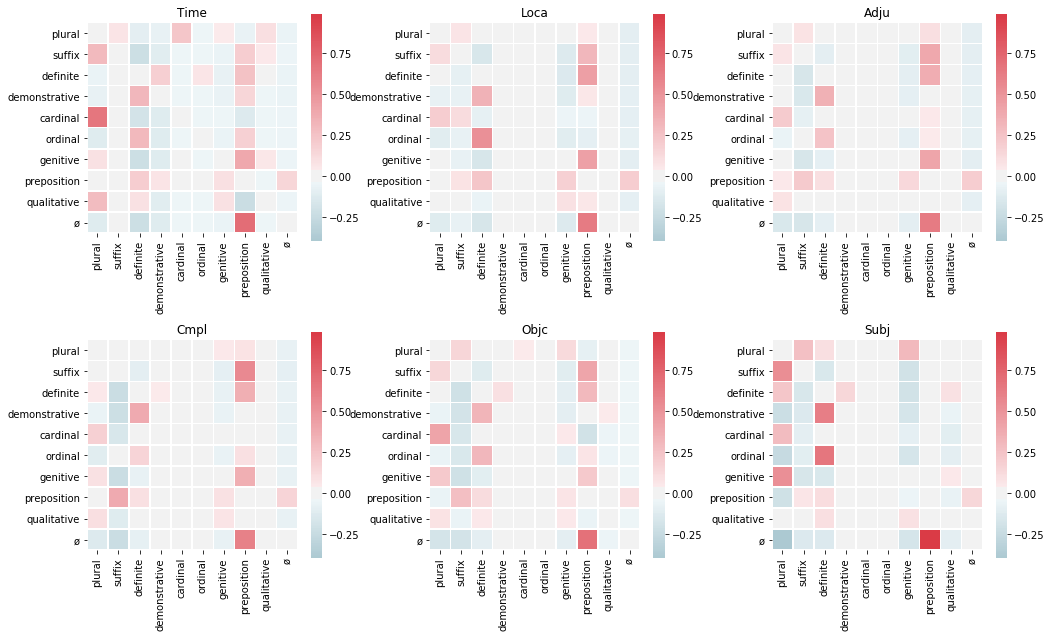

In [50]:
fig, axs = plt.subplots(2, 3, figsize=(17, 10))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for i, funct in enumerate(functions):
    heatmap(dp_comps[funct], ax=axs[i], vmin=min_score, vmax=max_score)
    axs[i].set_title(funct)

savefig('comp_comp_ΔP_function')
plt.show()

Unique to Time:

* plural is more predictive of cardinal, vice versa


### Build a Gephi network

We will export these scores in the form of edges in a Gephi network.

In [ ]:
gephi_dir = Path('../../gephi/adverbial_components/')

for funct in functions:

    gephi_nodes = pd.DataFrame(dp_comps[funct].index)
    gephi_nodes.columns=['Label']
    gephi_nodes.index.name = 'ID'

    edge_data = []
    for i1, comp1 in enumerate(dp_comps[funct].index):
        for i2, comp2 in enumerate(dp_comps[funct].columns):
            weight = round(dp_comps[funct].loc[comp1][comp2], 2)
            if weight and weight > 0:
                edge_data.append((i1, i2, weight))

    gephi_edges = pd.DataFrame(edge_data, columns=['Source', 'Target', 'Weight'])

    gephi_nodes.to_csv(gephi_dir.joinpath(f'{funct}_comp_nodes.csv'))
    gephi_edges.to_csv(gephi_dir.joinpath(f'{funct}_comp_edges.csv'), index=False)

**Gephi graph with ΔP as edge weight and Force Atlas 2**

<img src="../../gephi/advb_article/Time_comp_graph.svg" height="40%" width="40%">

In the graph we can make out 6 sub-networks:

* plural, cardinal
* suffix, plural, preposition
* genitive, plural, preposition
* definite, demonstrative, preposition
* definite, ordinal, preposition
* bare, preposition

## ΔP with Preposition Lexemes

In [54]:
prep_comps = head_mod_df[['leading_prep', 'plural', 'suffix', 'demonstrative', 'cardinal', 'ordinal', 'genitive', 'ø']] * 1
raw_prepXcomp = prep_comps.groupby('leading_prep').sum()
prepXcomp = raw_prepXcomp[raw_prepXcomp.sum(1) > 20]
prepXcomp

,plural,suffix,demonstrative,cardinal,ordinal,genitive,ø
leading_prep,,,,,,,
אחר,63,36,15,2,0,21,101
אל,398,376,56,17,1,520,993
את,1244,1582,262,54,12,1240,916
ב,1474,2075,440,83,163,2066,1392
בין,30,14,2,2,0,3,5
בעד,5,8,3,0,0,3,6
דרך,0,3,0,0,0,15,6
כ,217,139,61,31,5,344,157
כמו,4,0,0,0,0,4,31


In [55]:
dp_prepXcomp = mystats.apply_deltaP(prepXcomp, 0, 1)

dp_prepXcomp

,plural,suffix,demonstrative,cardinal,ordinal,genitive,ø
leading_prep,,,,,,,
אחר,0.057072,-0.084469,0.027426,-0.003040,-0.006681,-0.145404,0.155097
אל,-0.042971,-0.082404,-0.013158,-0.004587,-0.006745,-0.013284,0.163148
את,0.031944,0.076729,0.016497,-0.001525,-0.005329,0.001291,-0.119608
ב,-0.022331,0.046956,0.028940,-0.000853,0.019716,0.048870,-0.121297
בין,0.328244,0.014982,-0.000107,0.024341,-0.006640,-0.179233,-0.181587
בעד,-0.008102,0.085026,0.084250,-0.011429,-0.006633,-0.112559,-0.030553
דרך,-0.208265,-0.110136,-0.035850,-0.011429,-0.006633,0.392857,-0.020544
כ,0.020017,-0.092338,0.029062,0.021782,-0.001433,0.132417,-0.109508
כמו,-0.105671,-0.235358,-0.035869,-0.011434,-0.006636,-0.130072,0.525040


In [56]:
# fig,ax = plt.subplots(figsize=(8, 5))
# sns.heatmap(dp_prepXcomp, ax=ax, robust=True, center=0)
# ax.set_yticklabels((get_display(prep) for prep in dp_prepXcomp.index), rotation=0, size=12)
# plt.show()